# Центральная предельная теорема своими руками

Будем проверять работу центральной предельной теоремы, генерировать случайные числа и строить графики в Python.

В качеcтве распределения выбрана непрерывная случайная величина Стьюдента $t$ (*scipy.stats.t*).

Функция плотности вероятности для $t$:
$${f(x, \nu)}=\frac{Г((\nu+1)/2)}{\sqrt{\pi\nu}Г(\nu/2)}(1+x^2/\nu)^{-(\nu+1)/2}$$

где - $x$ действительное число, 

а параметр степеней свободы $\nu$ (обозначаемый в реализации как $df$) удовлетворяет $\nu > 0$. 

$Г$ — гамма-функция (*scipy.special.gamma*).

In [120]:
# подключение необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as sts
%matplotlib inline

In [121]:
# генерация выборки объёма 1000
df = 2.74
sample = sts.t.rvs(df, size=1000)

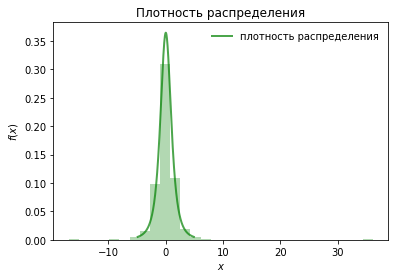

In [122]:
# построение гистрограммы выборки
plt.hist(sample, bins=30, density=True, color='g', alpha=0.3)

# добавление поверх неё теоретической плотности распределения случайной величины t
x = np.linspace(sts.t.ppf(0.01, df), sts.t.ppf(0.99, df), 1000)
pdf = sts.t.pdf(x, df)

plt.plot(x, pdf, 'g', lw=2, alpha=0.7, label='плотность распределения')
plt.title(f'Плотность распределения')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.show()

In [123]:
# получение информации о среднем и дисперсии + стандартном отклонении
mean, v = sts.t.stats(df, loc=0, scale=1, moments='mv')
std = sts.t.std(df, loc=0, scale=1)

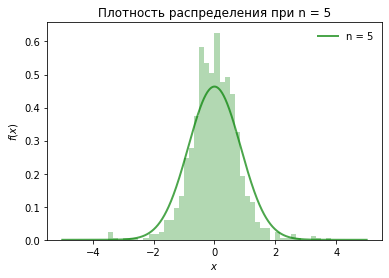

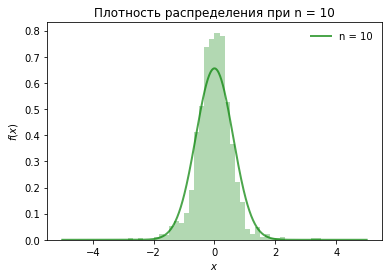

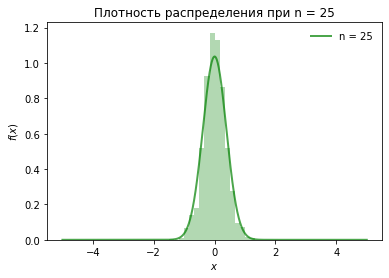

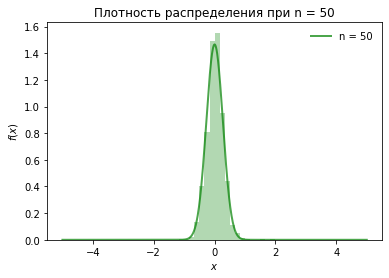

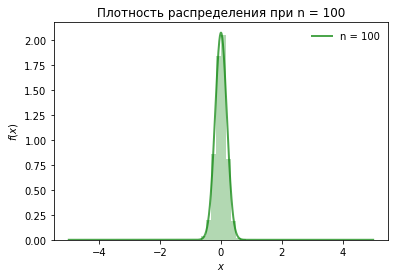

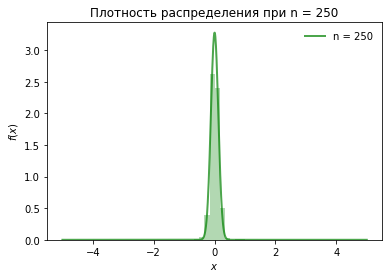

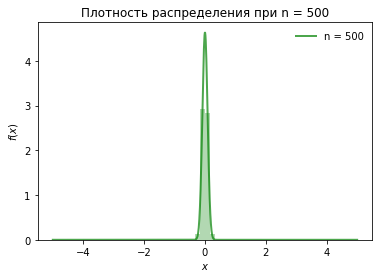

In [124]:
for n in [5, 10, 25, 50, 100, 250, 500]:
    #генерация выборочных средних
    sample_means = []
    for i in range(1000):
        sample_means.append(sts.t.rvs(df, size=n).mean())
    # дисперсия
    D = v / n
    # стандартное отклонение
    std = math.sqrt(D)
    # параметры нормальных распределений
    norm_dist = sts.norm(mean, std)
    x = np.linspace(-5, 5, 1000)
    pdf = norm_dist.pdf(x)
    
    # построение гистрограмм
    plt.hist(sample_means, bins=60, range=(-5, 5), density=True, color='g', alpha=0.3)
    plt.title(f'Плотность распределения при n = {n}')
    plt.plot(x, pdf, 'g', lw=2, alpha=0.7, label=f'n = {n}')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='upper right', frameon=False)
    plt.show()

С ростом параметра n, объёма выборки, точность аппроксимации распределения выборочных средних нормальным увеличивается. По графикам видно, что распределение становится близким к нормальному, что является наглядным подтверждением центральной предельной теоремы.